Fórmula encontrada: y = 0.251283789187 + 0.115212964739 * x


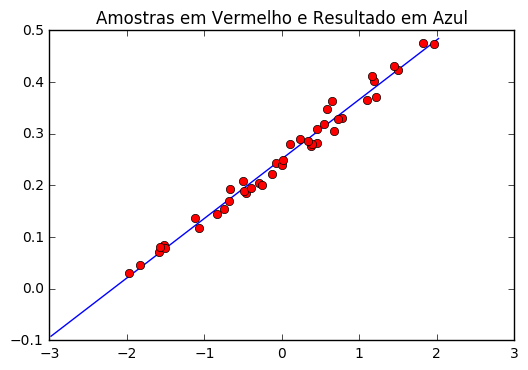

In [1]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
with open('test2.txt', 'rb') as data:
    #rows = reader(data, delimiter=',', quotechar='|')
    rows = reader(data, delimiter='\t', quotechar='|')
    x = []
    for row in rows:
        y = []
        for i in row:
            if i:
                y.append(i.replace(',','.'))
        x.append(y)
    x = np.array(x, dtype=float)
    X = x[:,:-1]
    y = x[:,-1][np.newaxis].T

mu = X.mean(axis=0)
sigma = X.std(axis=0)
N = len(X[0,:])
M = len(y)
temp = (X-mu)/sigma
X = np.ones((M,N+1))
X[:,1:] = temp

theta = np.zeros((X.shape[1],1))

num_iters = 1500
alpha = 0.01
J_history = np.zeros((num_iters))

h = np.zeros((M,1))
for iter in range(num_iters):
    h[:,0] = np.dot(X,theta)[:,0]
    J = np.dot((h-y).T,(h-y))/(2*M)
    J_history[iter] = J
    theta = theta - (alpha/M * np.dot((h-y).T,X)).T


print 'Fórmula encontrada: y =', theta[0][0], '+', theta[1][0], '* x'
    
t = np.arange(min(X[:,1]-1),max(X[:,1]+1))
h = theta[0]+t*theta[1]
plt.plot(t, h)
plt.plot(X[:,1:], y, 'ro')
plt.title('Amostras em Vermelho e Resultado em Azul')
plt.show()

#plt.plot(range(num_iters), J_history)
#plt.show()
